2023-10-31 08:45:47.951175: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-10-31 08:45:48.004678: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
CUDA backend failed to initialize: FAILED_PRECONDITION: No visible GPU devices. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


<class 'waymax.config.DatasetConfig'>
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


""

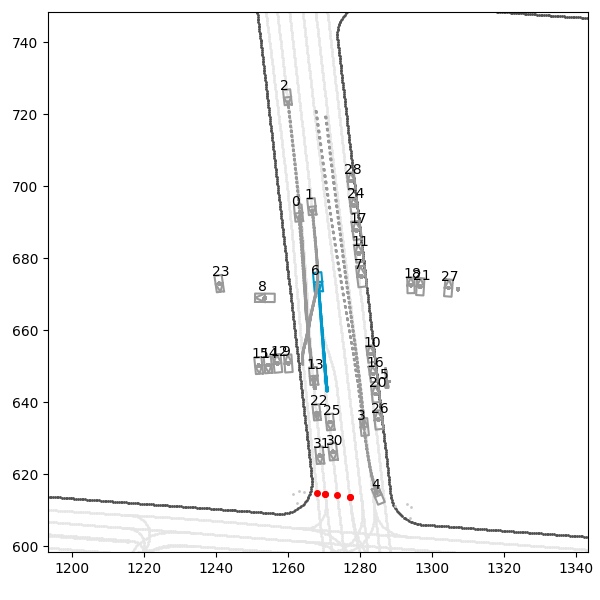

In [1]:
import numpy as np
import mediapy
from tqdm import tqdm
import dataclasses


from waymax import config as _config
from waymax.config import DatasetConfig, DataFormat
from waymax import dataloader
from waymax import datatypes
from waymax import visualization


myconfig = DatasetConfig(
    # path='./training.tfrecord-00100-of-01000',
    # path='gs://waymo_open_dataset_motion_v_1_1_0/uncompressed/tf_example/training/training_tfexample.tfrecord@1000',
    # path="/home/yqnj/testing/testing.tfrecord@150",
    # path = './training.tfrecord@1',
    # path = "./uncompressed_tf_example_training_training_tfexample.tfrecord@1000",
    # path ="./v1_2_0_uncompressed_tf_example_validation_validation_tfexample.tfrecord@150",
    # path ="./v1_1_0_uncompressed_tf_example_validation_validation_tfexample.tfrecord-00000-of-00150",
    path ="./v1_1_0_uncompressed_tf_example_training_training_tfexample.tfrecord-00000-of-01000",
    max_num_rg_points=20000,
    data_format=DataFormat.TFRECORD,
)

config = dataclasses.replace(myconfig, max_num_objects=32)

print(type(config))
data_iter = dataloader.simulator_state_generator(config=config)

scenario = next(data_iter)

img = visualization.plot_simulator_state(scenario, use_log_traj = True)

mediapy.show_image(img)
# print("hello")
# imgs = []

# state = scenario
# for _ in range(scenario.remaining_timesteps):
#   state = datatypes.update_state_by_log(state, num_steps=1)
#   imgs.append(visualization.plot_simulator_state(state, use_log_traj=True))

# mediapy.show_video(imgs, fps=10)

In [3]:
log_trajectory = scenario.log_trajectory

# Number of objects stored in this trajectory.
print('Number of objects:', log_trajectory.num_objects)
print('Number of timesteps:', log_trajectory.num_timesteps)
print('Trajectory shape (num_objects, num_timesteps):', log_trajectory.shape)
print('XYZ positions (num_objects, num_timesteps, 3):', log_trajectory.xyz.shape)
print('XY velocities (num_objects, num_timesteps, 2):', log_trajectory.vel_xy.shape)
print('Yaw (num_objects, num_timesteps):', log_trajectory.yaw.shape)
print(type(scenario))

Number of objects: 32
Number of timesteps: 91
Trajectory shape (num_objects, num_timesteps): (32, 91)
XYZ positions (num_objects, num_timesteps, 3): (32, 91, 3)
XY velocities (num_objects, num_timesteps, 2): (32, 91, 2)
Yaw (num_objects, num_timesteps): (32, 91)
<class 'waymax.datatypes.simulator_state.SimulatorState'>
